In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

### Prova da Uniforme

Para mostrar que $X = \sum_{i=1}^{\infty} 2^{-i} X_i$, onde $X_i$ são variáveis aleatórias de Bernoulli independentes com probabilidade $p = \frac{1}{2}$, é uma variável aleatória uniformemente distribuída em $[0, 1]$, levaremos em consideração:

#### 1. Definição da Série

$X_i$ pode assumir os valores 0 ou 1 com probabilidade $p = \frac{1}{2}$. Então, a soma $X = \sum_{i=1}^{\infty} 2^{-i} X_i$ é uma série de termos decrescentes e limitados, onde cada termo $2^{-i} X_i$ é um número na forma binária.

A soma $X = \sum_{i=1}^{\infty} 2^{-i} X_i$ pode ser interpretada como a expansão binária de um número na base 2. Cada $X_i$ representa um dígito binário (0 ou 1), e o peso de cada dígito é $2^{-i}$, que é a o valor do $i$-ésimo dígito na expansão binária.

#### 2. Distribuição

Para provar que $X$ é uniformemente distribuído em $[0, 1]$, consideraremos a função de distribuição acumulada (CDF) $F_X(x)$ de $X$. Devemos mostrar que $F_X(x) = x$ para $x \in [0, 1]$.

Notamos que $X$ pode ser interpretado como o número real no intervalo $[0, 1)$ cuja expansão binária é dada pelos $X_i$. Como cada $X_i$ é independentemente 0 ou 1 com probabilidade $\frac{1}{2}$, a escolha de qualquer número na expansão binária é igualmente provável, o que implica que cada número no intervalo $[0, 1)$ é igualmente provável de ser formado pela série.

#### 4. Calculo da CDF

Para $0 \leq x < 1$, podemos escrever $x$ em sua expansão binária:
$
x = \sum_{i=1}^{\infty} \frac{b_i}{2^i}
$
onde $b_i$ são 0 ou 1 (dígitos binários). A probabilidade de $X \leq x$ é a mesma que a probabilidade de a série $ \sum_{i=1}^{\infty} 2^{-i} X_i \leq \sum_{i=1}^{\infty} \frac{b_i}{2^i} $.

Como $X_i$ são independentes e cada $X_i$ tem probabilidade $0.5$ de ser 0 ou 1, a probabilidade de que a expansão binária de $X$ seja menor ou igual à de $x$ é exatamente a fração $x$ do intervalo $[0, 1)$. Assim, a CDF de $X$ é:
$
F_X(x) = \mathbb{P}(X \leq x) = x
$
para $0 \leq x < 1$.

Concluindo, visto que a CDF $F_X(x) = x$ é a mesma CDF de uma variável uniforme no intervalo $[0, 1)$, concluímos que $X$ é uniformemente distribuído em $[0, 1)$.

Portanto, $X = \sum_{i=1}^{\infty} 2^{-i} X_i$, onde $X_i$ são variáveis de Bernoulli com $p = \frac{1}{2}$, é uma variável aleatória uniformemente distribuída em $[0, 1)$.

In [2]:
#definimos a Uniforme gerada a partir da série como:

def uniform_random(num_samples, k):
    samples = np.zeros(num_samples)
    for i in range(k):
        X_i = np.random.binomial(1, 0.5, num_samples)
        samples += X_i * (2 ** -(i + 1))
    return samples

### 5. Implementação de Gerador de Números Uniformemente Distribuídos

Para implementar um gerador de números uniformemente distribuídos vamos trunkar a soma 
$ X = \sum_{i=1}^{\infty} 2^{-i} X_i $ após $ k $ parcelas, precisamos determinar um valor $ k $ suficientemente grande para que a haja uma boa precisão.

Levaremos em consideração que em geral, a precisão numérica de máquinas modernas usando ponto flutuante de dupla precisão é da ordem de $ 2^{-53} $. Portanto, podemos truncar a soma em $ k = 53 $.

### 6. Plotagem do gráfico
Amostraremos então 1000 samples usando a distribuição criada:


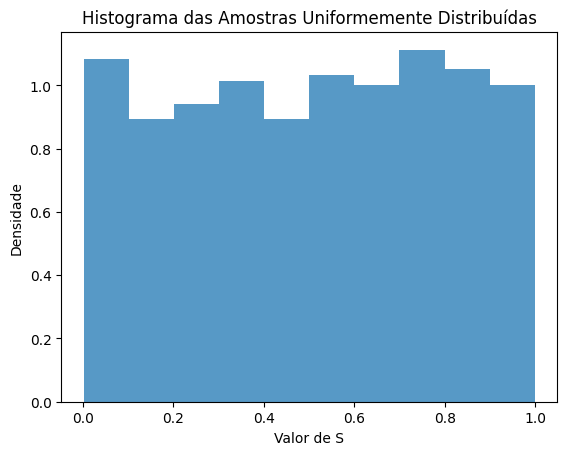

In [3]:
# Número de amostras
num_samples = 1000
# Valor de k para truncamento
k = 53

# Gerar amostras
samples = uniform_random(num_samples, k)

# Plotar histograma
plt.hist(samples, bins=10, density=True, alpha=0.75)
plt.title('Histograma das Amostras Uniformemente Distribuídas')
plt.xlabel('Valor de S')
plt.ylabel('Densidade')
plt.show()

Apesar de ter uma aparência semelhante a uniforme, ainda vemos irregularidades no gráfico da pdf. Vejamos os resultados se aumentarmos o número de samples, testaremos dessa vez não com apenas 1000 samples mas com 10 mil e com 100 mil. Vendo os resultados podemos perceber que quanto maior a amostra mais uniformemente destribuido.

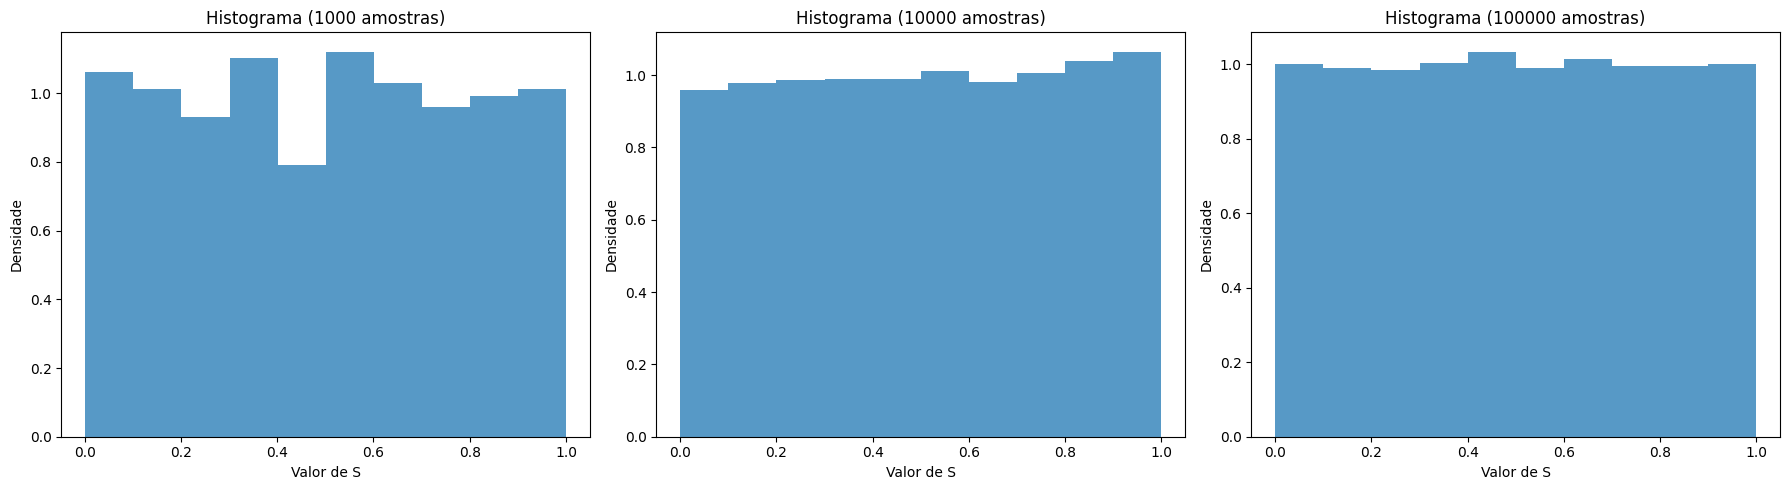

In [4]:
# Valores de k para truncamento
k = 53

# Gerar amostras para diferentes tamanhos de amostra
samples_1000 = uniform_random(1000, k)
samples_10000 = uniform_random(10000, k)
samples_100000 = uniform_random(100000, k)

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotar histograma para 1000 amostras
axs[0].hist(samples_1000, bins=10, density=True, alpha=0.75)
axs[0].set_title('Histograma (1000 amostras)')
axs[0].set_xlabel('Valor de S')
axs[0].set_ylabel('Densidade')

# Plotar histograma para 10000 amostras
axs[1].hist(samples_10000, bins=10, density=True, alpha=0.75)
axs[1].set_title('Histograma (10000 amostras)')
axs[1].set_xlabel('Valor de S')
axs[1].set_ylabel('Densidade')

# Plotar histograma para 100000 amostras
axs[2].hist(samples_100000, bins=10, density=True, alpha=0.75)
axs[2].set_title('Histograma (100000 amostras)')
axs[2].set_xlabel('Valor de S')
axs[2].set_ylabel('Densidade')

# Ajustar layout
plt.tight_layout()
plt.show()

### Geração de Distribuições a partir da Uniforme

#### Distribuição Exponencial ($ \text{Expo}(1) $)

A variável aleatória exponencial com parâmetro $ \lambda = 1 $ ($ \text{Expo}(1) $) tem função de distribuição acumulada (CDF):
$$ F(x) = 1 - e^{-x}, \quad x \geq 0. $$

Para gerar uma variável aleatória exponencial com parâmetro $ \lambda = 1 $:

Se $ U \sim U(0, 1) $, então $ F^{-1}(U) $ segue a distribuição de $ \text{Expo}(1) $, onde $ F^{-1}(u) = -\ln(1 - u) $.

Portanto, para gerar uma amostra de $ \text{Expo}(1) $:

$ X = -\ln(1 - U)$.

#### Distribuição Normal ($ \mathcal{N}(0, 1) $) (usando o método de Box-Muller)

A variável aleatória normal padrão ($ \mathcal{N}(0, 1) $) tem função de distribuição acumulada (CDF):
$$ \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} \, dt. $$

Para gerar uma variável aleatória normal padrão:

Se $ U_1, U_2 \sim U(0, 1) $ independentes, então:

$ Z_0 = \sqrt{-2 \ln U_1} \cos(2\pi U_2) $ e $ Z_1 = \sqrt{-2 \ln U_1} \sin(2\pi U_2) $
são independentemente distribuídas como $ \mathcal{N}(0, 1) $.

Portanto, para obter uma amostra de $ \mathcal{N}(0, 1) $:

$ X = Z_0 $, $ X = Z_1, $ ou $ X = Z_1 + Z_0 $
onde $ Z_0 $ e $ Z_1 $ são gerados pelo método Box-Muller.

Faremos então as implementações das inversas e a projeção dos gráficos com 100 mil samples para melhorar a visualização a partir da uniforme que criamos:

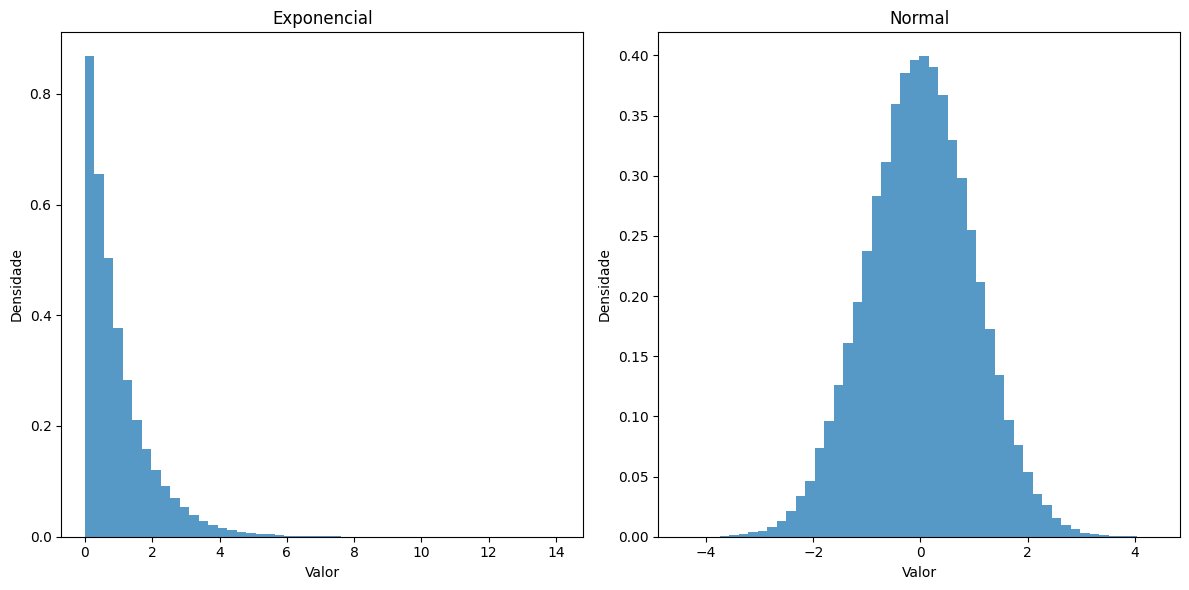

In [5]:
def exponential_random(uniform_samples, lambda_=1.0):
    return -np.log(1 - uniform_samples) / lambda_

def normal_random(num_samples):
    U1 = uniform_random(num_samples // 2, k)
    U2 = uniform_random(num_samples // 2, k)
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return np.concatenate((Z0, Z1))

# Transformar em amostras exponenciais
lambda_ = 1.0
exp_samples = exponential_random(samples_100000, lambda_)

# Transformar em amostras normais
normal_samples = normal_random(100000)

# Plotar histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(exp_samples, bins=50, density=True, alpha=0.75)
plt.title('Exponencial')
plt.xlabel('Valor')
plt.ylabel('Densidade')

plt.subplot(1, 2, 2)
plt.hist(normal_samples, bins=50, density=True, alpha=0.75)
plt.title('Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()